<a href="https://colab.research.google.com/github/Sol20201/TelecomoX_parte2/blob/main/TelecomXpte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Telecom X Parte 2: Predicción de Cancelación*

## 🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## 🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

In [1]:
import pandas as pd


In [2]:
datos = pd.read_csv('df_final.csv')

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 7267 non-null   object 
 1   abandono                   7267 non-null   int64  
 2   género                     7267 non-null   object 
 3   ciudadano_mayor            7267 non-null   int64  
 4   pareja                     7267 non-null   int64  
 5   dependientes               7267 non-null   int64  
 6   antigüedad                 7267 non-null   int64  
 7   servicio_telefónico        7267 non-null   int64  
 8   líneas_múltiples           7267 non-null   int64  
 9   servicio_internet          7267 non-null   object 
 10  seguridad_online           7267 non-null   int64  
 11  copia_de_seguridad_online  7267 non-null   int64  
 12  protección_dispositivo     7267 non-null   int64  
 13  soporte_técnico            7267 non-null   int64

## Eliminar columnas que no aportan valor al análisis

In [4]:
datos.nunique().sort_values()


,0
abandono,2
género,2
ciudadano_mayor,2
pareja,2
servicio_telefónico,2
dependientes,2
seguridad_online,2
líneas_múltiples,2
streaming_tv,2
soporte_técnico,2


In [5]:
datos = datos.drop(columns=['cuentas_diarias'])

In [6]:
datos.sample(5)

,id_cliente,abandono,género,ciudadano_mayor,pareja,dependientes,antigüedad,servicio_telefónico,líneas_múltiples,servicio_internet,...,copia_de_seguridad_online,protección_dispositivo,soporte_técnico,streaming_tv,streaming_peliculas,contrato,facturación_sin_papel,método_pago,cargos_mensuales,cargos_totales
924,1304 NECVQ,1,Female,1,0,0,2,1,1,Fiber optic,...,0,1,0,0,0,Month to month,1,Electronic check,78.55,149.55
978,1373 ORVIZ,1,Female,0,1,1,11,1,1,DSL,...,0,0,1,0,1,Month to month,1,Electronic check,66.35,740.80
813,1153 GNOLC,0,Male,0,0,0,33,0,0,DSL,...,1,0,0,1,0,One year,1,Electronic check,39.10,1309.00
5334,7279 NMVJC,0,Female,0,0,0,17,1,0,No,...,0,0,0,0,0,One year,0,Bank transfer (automatic),19.90,323.15
1577,2243 FNMMI,0,Male,0,0,0,20,1,0,No,...,0,0,0,0,0,Month to month,0,Mailed check,19.40,415.40


In [7]:
datos = datos.drop(['id_cliente'], axis=1)

In [8]:
datos.sample(5)

,abandono,género,ciudadano_mayor,pareja,dependientes,antigüedad,servicio_telefónico,líneas_múltiples,servicio_internet,seguridad_online,copia_de_seguridad_online,protección_dispositivo,soporte_técnico,streaming_tv,streaming_peliculas,contrato,facturación_sin_papel,método_pago,cargos_mensuales,cargos_totales
5718,0,Male,1,0,0,31,1,1,Fiber optic,0,0,1,1,1,0,Month to month,1,Bank transfer (automatic),96.60,2877.95
808,0,Female,0,0,0,51,1,0,Fiber optic,0,0,0,0,1,1,One year,0,Credit card (automatic),87.55,4475.90
5723,0,Male,0,0,0,14,1,0,No,0,0,0,0,0,0,One year,0,Bank transfer (automatic),20.40,275.70
6180,0,Male,0,1,1,67,1,1,Fiber optic,1,0,0,1,1,1,Two year,0,Bank transfer (automatic),104.60,6885.75
7170,0,Female,0,0,0,34,1,0,No,0,0,0,0,0,0,Month to month,0,Mailed check,20.35,673.20


## Encoding

In [9]:
datos.select_dtypes(include=['object']).columns.tolist()

['género', 'servicio_internet', 'contrato', 'método_pago']

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Definimos las columnas categóricas
columnas_categoricas = ['género', 'servicio_internet', 'contrato', 'método_pago']

# Construimos el transformador
transformador = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), columnas_categoricas)
    ],
    remainder='passthrough'  # Las columnas no categóricas se conservan
)

# Aplicamos la transformación
datos_transformados = transformador.fit_transform(datos)

# Si quieres pasarlo a DataFrame nuevamente:
import pandas as pd

# Obtener nombres de las columnas generadas
nombres_columnas = transformador.get_feature_names_out()

# Crear nuevo DataFrame codificado
datos_codificados = pd.DataFrame(datos_transformados, columns=nombres_columnas)

In [11]:
datos_codificados.head()

,onehot__género_Male,onehot__servicio_internet_Fiber optic,onehot__servicio_internet_No,onehot__contrato_One year,onehot__contrato_Two year,onehot__método_pago_Credit card (automatic),onehot__método_pago_Electronic check,onehot__método_pago_Mailed check,remainder__abandono,remainder__ciudadano_mayor,...,remainder__líneas_múltiples,remainder__seguridad_online,remainder__copia_de_seguridad_online,remainder__protección_dispositivo,remainder__soporte_técnico,remainder__streaming_tv,remainder__streaming_peliculas,remainder__facturación_sin_papel,remainder__cargos_mensuales,remainder__cargos_totales
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40


## Verificación de la Proporción de Cancelación

In [12]:
# Conteo de clases
conteo = datos_codificados['remainder__abandono'].value_counts()

# Proporción de cada clase
proporcion = datos_codificados['remainder__abandono'].value_counts(normalize=True)

print("Conteo:")
print(conteo)
print("\nProporciones:")
print(proporcion)



Conteo:
remainder__abandono
0.0    5398
1.0    1869
Name: count, dtype: int64

Proporciones:
remainder__abandono
0.0    0.74281
1.0    0.25719
Name: proportion, dtype: float64


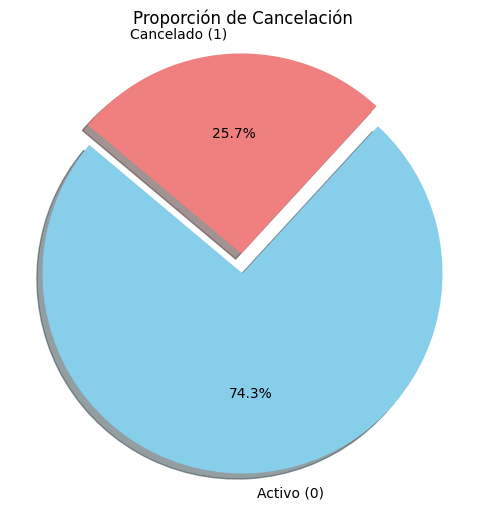

In [37]:
import matplotlib.pyplot as plt

# Conteo de clases
conteo = datos_codificados['remainder__abandono'].value_counts()

# Etiquetas y tamaños para el gráfico circular
etiquetas = ['Activo (0)', 'Cancelado (1)']
sizes = [conteo[0.0], conteo[1.0]]
colores = ['skyblue', 'lightcoral']
explode = (0, 0.1)  # Destacar la porción de cancelación

# Crear el gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=etiquetas, colors=colores, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Proporción de Cancelación")
plt.axis('equal')  # Asegura que el círculo sea un círculo.
plt.show()

## Balanceo

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Instanciamos el modelo con balanceo de clases
modelo_rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

In [18]:
from sklearn.model_selection import train_test_split

# Separar X e y
X = datos_codificados.drop(columns=["remainder__abandono"])
y = datos_codificados["remainder__abandono"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [19]:
from sklearn.impute import SimpleImputer

# Imputamos usando la media
imputador = SimpleImputer(strategy="mean")
X_train_imputado = imputador.fit_transform(X_train)

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_imputado, y_train)

/tmp/ipython-input-38-2038749788.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cancelación", data=df_balanceado, palette="Set2")


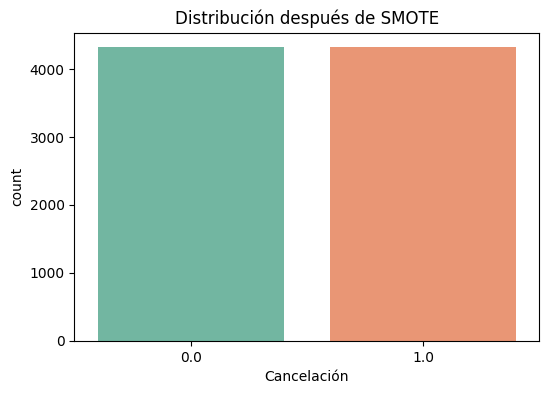

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combinar datos balanceados
df_balanceado = pd.DataFrame(X_train_bal, columns=X_train.columns)
df_balanceado["Cancelación"] = y_train_bal

plt.figure(figsize=(6,4))
sns.countplot(x="Cancelación", data=df_balanceado, palette="Set2")
plt.title("Distribución después de SMOTE")
plt.show()

In [39]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_bal, y_train_bal)
dummy_score = dummy_clf.score(X_test, y_test)

print(f"Dummy Score: {dummy_score}")

Dummy Score: 0.7427785419532325


## Normalización

In [21]:
import pandas as pd

X_train_bal = pd.DataFrame(X_train_bal, columns=X_train.columns)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Instanciamos el modelo con clase balanceada
modelo_rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

# Entrenamos el modelo
modelo_rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [40]:
modelo_rf.score(X_test, y_test)

0.7730398899587345

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

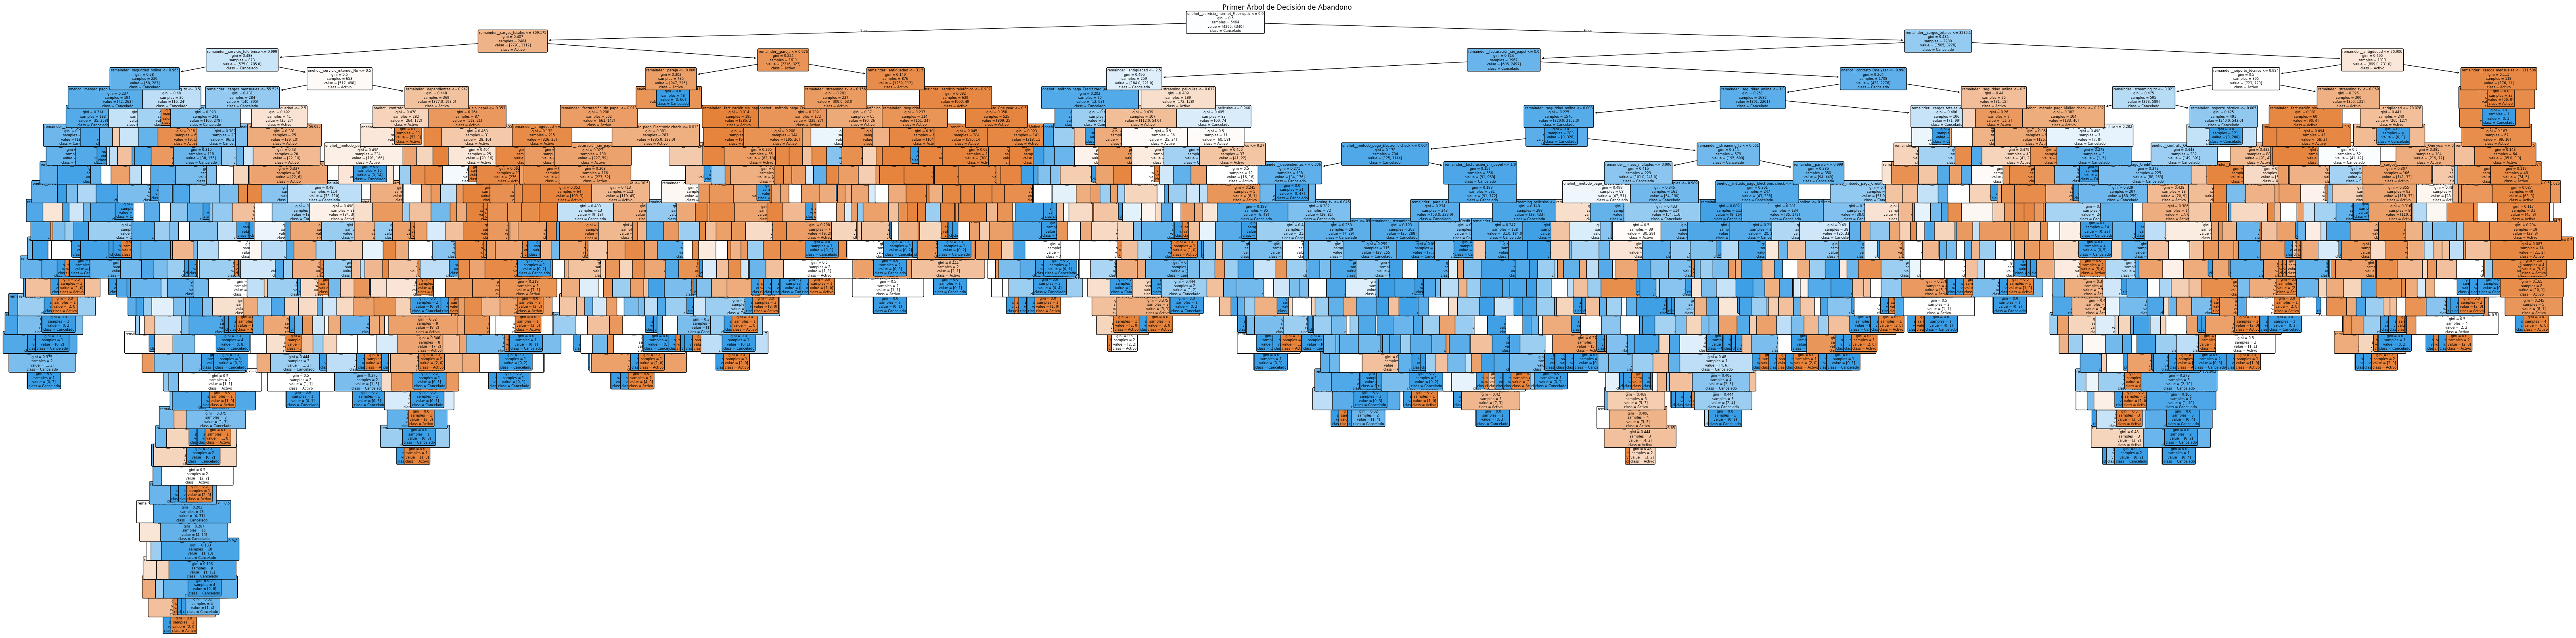

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Seleccionar un árbol individual del Random Forest (por ejemplo, el primero)
arbol_individual = modelo_rf.estimators_[0]

# Graficar el árbol de decisión con espaciado ajustado
plt.figure(figsize=(80, 20)) # Aumentamos el tamaño de la figura
plot_tree(arbol_individual,
          feature_names=X_train_bal.columns,  # Nombres de las características
          class_names=['Activo', 'Cancelado'],  # Nombres de las clases
          filled=True,
          rounded=True,
          fontsize=6) # Reducimos un poco el tamaño de la fuente para que quepa mejor
plt.title("Primer Árbol de Decisión de Abandono")
plt.show()

In [50]:
modelo_rf.score(X_train_bal, y_train_bal)

0.9939786938397406

In [58]:
modelo_rf = RandomForestClassifier(max_depth=5, random_state=5)
modelo_rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(max_depth=5, random_state=5)

In [59]:
modelo_rf.score(X_test, y_test)

0.7771664374140302

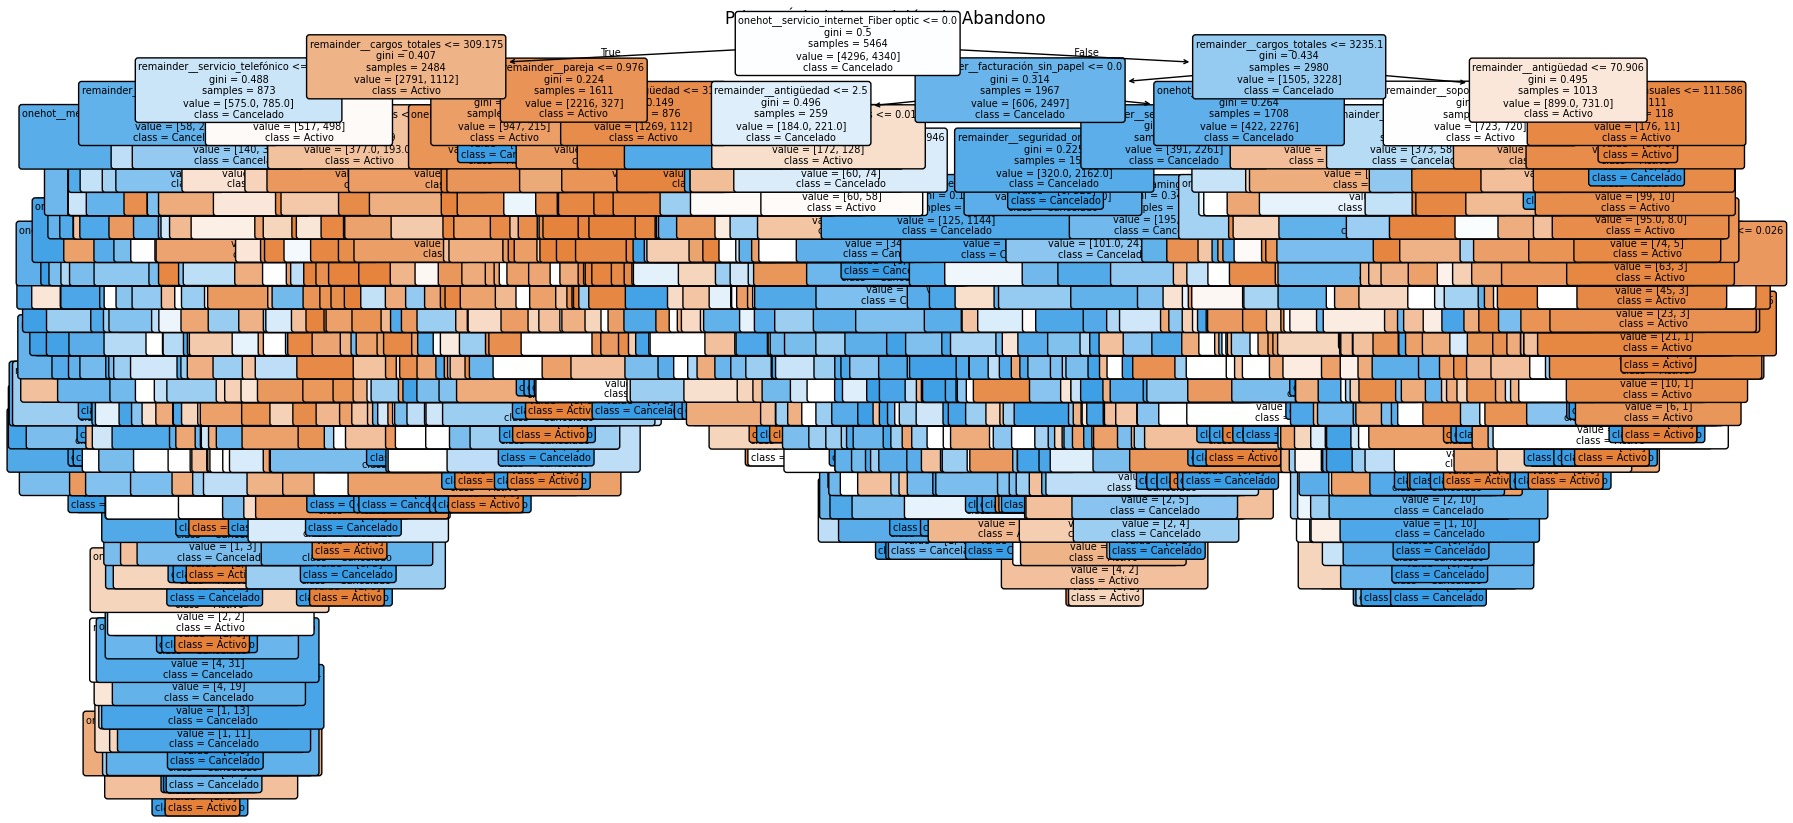

In [60]:
plt.figure(figsize=(20, 10))
plot_tree(arbol_individual,
          feature_names=X_train_bal.columns,
          class_names=['Activo', 'Cancelado'],
          filled=True,
          rounded=True,
          fontsize=7)
plt.title("Primer Árbol de Decisión de Abandono")
plt.show()

In [67]:
modelo_rf.score(X_train_bal, y_train_bal)

0.8417091245947198

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el scaler solo en los datos de entrenamiento balanceados y transformar
X_train_scaled = scaler.fit_transform(X_train_bal)

# Transformar los datos de prueba usando el scaler ajustado en el entrenamiento
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame para mantener los nombres de las columnas si es necesario
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_bal.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Datos de entrenamiento escalados (primeras 5 filas):")
display(X_train_scaled.head())

print("\nDatos de prueba escalados (primeras 5 filas):")
display(X_test_scaled.head())

Datos de entrenamiento escalados (primeras 5 filas):


,onehot__género_Male,onehot__servicio_internet_Fiber optic,onehot__servicio_internet_No,onehot__contrato_One year,onehot__contrato_Two year,onehot__método_pago_Credit card (automatic),onehot__método_pago_Electronic check,onehot__método_pago_Mailed check,remainder__ciudadano_mayor,remainder__pareja,...,remainder__líneas_múltiples,remainder__seguridad_online,remainder__copia_de_seguridad_online,remainder__protección_dispositivo,remainder__soporte_técnico,remainder__streaming_tv,remainder__streaming_peliculas,remainder__facturación_sin_papel,remainder__cargos_mensuales,remainder__cargos_totales
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.061753,0.112434
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.679781,0.206543
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.669821,0.541726
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.017430,0.100115
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.728088,0.663039



Datos de prueba escalados (primeras 5 filas):


,onehot__género_Male,onehot__servicio_internet_Fiber optic,onehot__servicio_internet_No,onehot__contrato_One year,onehot__contrato_Two year,onehot__método_pago_Credit card (automatic),onehot__método_pago_Electronic check,onehot__método_pago_Mailed check,remainder__ciudadano_mayor,remainder__pareja,...,remainder__líneas_múltiples,remainder__seguridad_online,remainder__copia_de_seguridad_online,remainder__protección_dispositivo,remainder__soporte_técnico,remainder__streaming_tv,remainder__streaming_peliculas,remainder__facturación_sin_papel,remainder__cargos_mensuales,remainder__cargos_totales
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.375000,0.039990
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.747510,0.008597
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.266932,0.204454
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333665,0.021036
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.222112,0.022929


In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo KNN
# Puedes ajustar el número de vecinos (n_neighbors) según sea necesario
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento normalizados y balanceados
modelo_knn.fit(X_train_scaled, y_train_bal)

KNeighborsClassifier()

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Re-aplicar la imputación a los datos de prueba (usando el imputador ya ajustado en el entrenamiento)
X_test_imputado = imputador.transform(X_test)

# Aplicar la normalización a los datos de prueba imputados (usando el scaler ya ajustado)
X_test_scaled = scaler.transform(X_test_imputado)

# Convertir de nuevo a DataFrame para mantener los nombres de las columnas
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Ahora sí, evaluar el modelo KNN con los datos de prueba imputados y escalados
modelo_knn.score(X_test_scaled, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.6767537826685007

In [68]:
# Obtener los scores de los modelos
score_dummy = dummy_score
score_rf = modelo_rf.score(X_test, y_test)
score_knn = modelo_knn.score(X_test_scaled, y_test)

# Crear la lista de scores
lista_scores = [
    {"Modelo": "Dummy Classifier", "Score (Accuracy)": score_dummy},
    {"Modelo": "Random Forest", "Score (Accuracy)": score_rf},
    {"Modelo": "KNN", "Score (Accuracy)": score_knn}
]

# Imprimir la lista de scores
import pandas as pd
display(pd.DataFrame(lista_scores))

,Modelo,Score (Accuracy)
0,Dummy Classifier,0.742779
1,Random Forest,0.777166
2,KNN,0.676754


## Análisis de Correlación

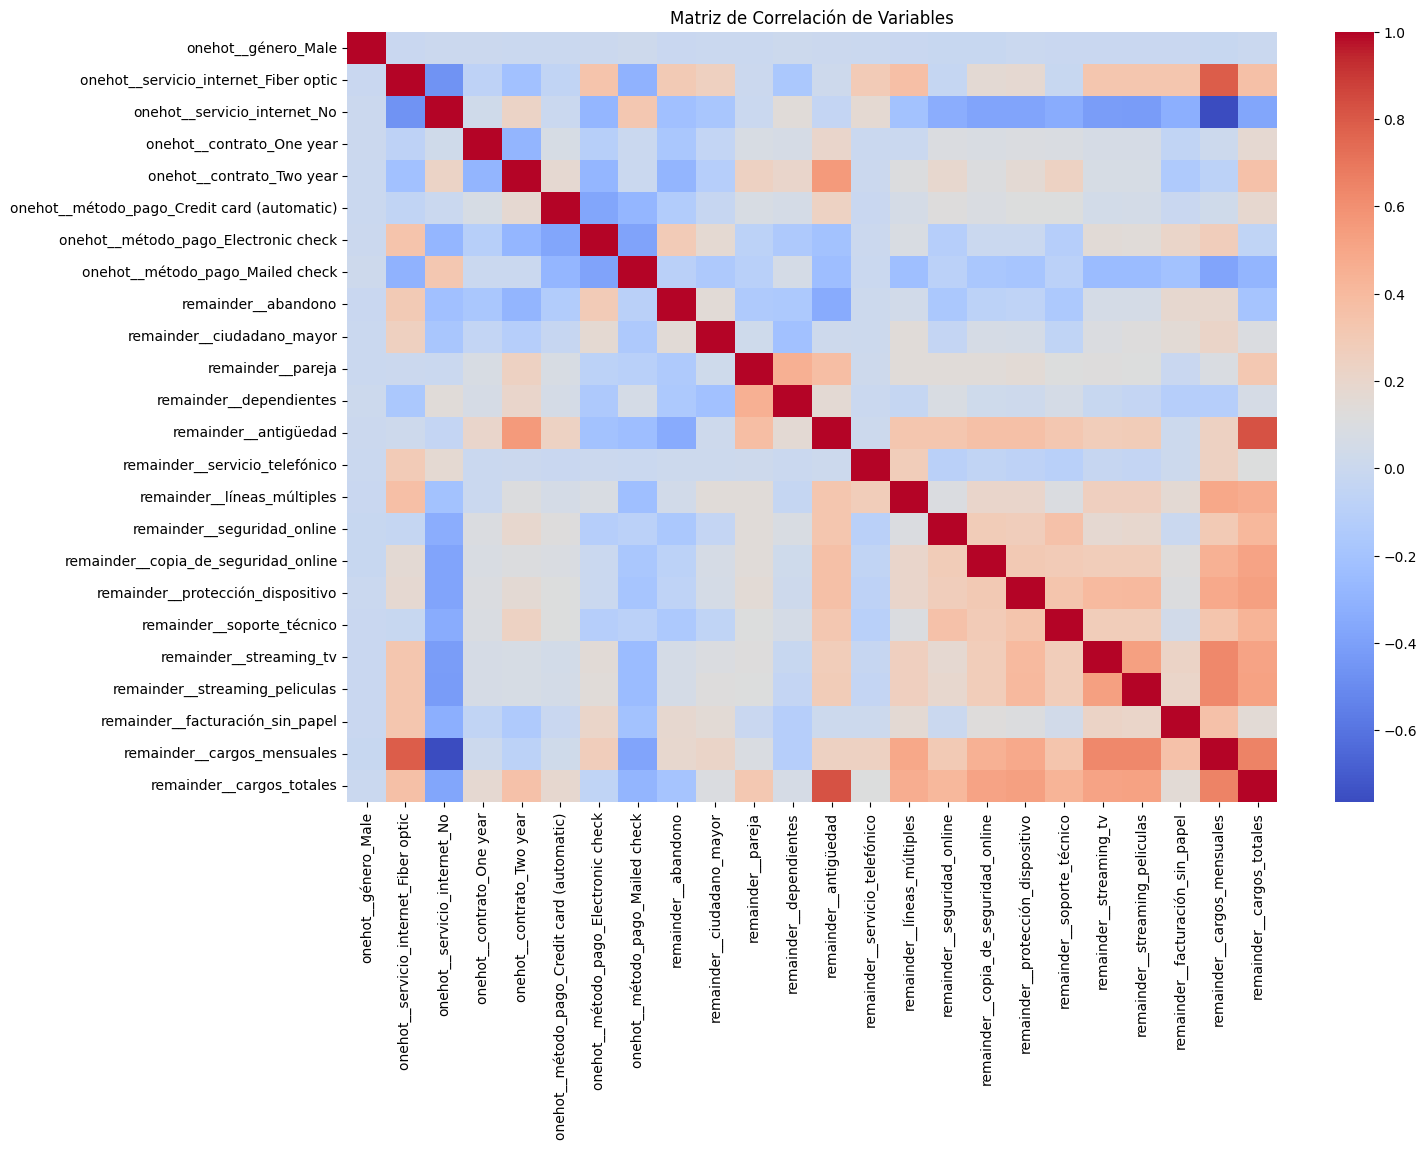


Correlación con la variable 'abandono':


,remainder__abandono
remainder__abandono,1.000000
onehot__servicio_internet_Fiber optic,0.300949
onehot__método_pago_Electronic check,0.294626
remainder__cargos_mensuales,0.189866
remainder__facturación_sin_papel,0.186666
remainder__ciudadano_mayor,0.146733
remainder__streaming_tv,0.062430
remainder__streaming_peliculas,0.060586
remainder__líneas_múltiples,0.039343
remainder__servicio_telefónico,0.012571


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
matriz_corr = datos_codificados.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de Variables")
plt.show()

# Mostrar las correlaciones con la variable objetivo 'abandono'
correlaciones_objetivo = matriz_corr['remainder__abandono'].sort_values(ascending=False)
print("\nCorrelación con la variable 'abandono':")
display(correlaciones_objetivo)

## Análisis Dirigido

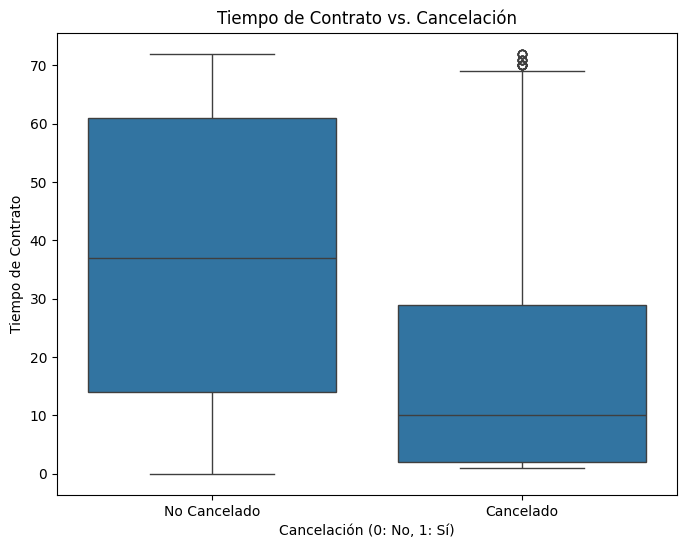

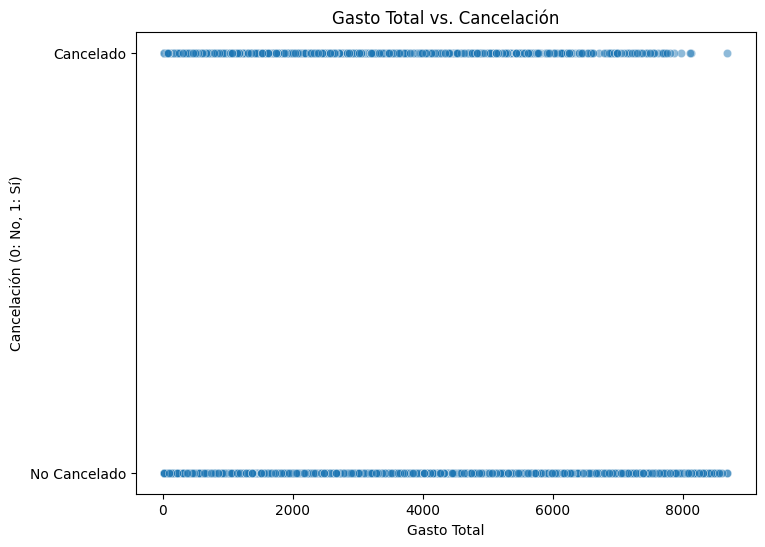

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para Tiempo de Contrato vs. Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(x='remainder__abandono', y='remainder__antigüedad', data=datos_codificados)
plt.title('Tiempo de Contrato vs. Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato')
plt.xticks([0, 1], ['No Cancelado', 'Cancelado'])
plt.show()

# Scatter plot para Gasto Total vs. Cancelación
plt.figure(figsize=(8, 6))
sns.scatterplot(x='remainder__cargos_totales', y='remainder__abandono', data=datos_codificados, alpha=0.5)
plt.title('Gasto Total vs. Cancelación')
plt.xlabel('Gasto Total')
plt.ylabel('Cancelación (0: No, 1: Sí)')
plt.yticks([0, 1], ['No Cancelado', 'Cancelado'])
plt.show()

## Evaluación de modelos

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Evaluación del modelo Random Forest ---
print("--- Evaluación del Modelo Random Forest ---")
y_pred_rf = modelo_rf.predict(X_test)

print("\nInforme de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nMatriz de Confusión (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nAccuracy (Random Forest):")
print(accuracy_score(y_test, y_pred_rf))


# --- Evaluación del modelo KNN ---
print("\n\n--- Evaluación del Modelo KNN ---")
# Asegurarse de usar los datos de prueba escalados para KNN
y_pred_knn = modelo_knn.predict(X_test_scaled)

print("\nInforme de Clasificación (KNN):")
print(classification_report(y_test, y_pred_knn))

print("\nMatriz de Confusión (KNN):")
print(confusion_matrix(y_test, y_pred_knn))

print("\nAccuracy (KNN):")
print(accuracy_score(y_test, y_pred_knn))

--- Evaluación del Modelo Random Forest ---

Informe de Clasificación (Random Forest):
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      1080
         1.0       0.55      0.72      0.62       374

    accuracy                           0.78      1454
   macro avg       0.72      0.76      0.73      1454
weighted avg       0.80      0.78      0.79      1454


Matriz de Confusión (Random Forest):
[[862 218]
 [106 268]]

Accuracy (Random Forest):
0.7771664374140302


--- Evaluación del Modelo KNN ---

Informe de Clasificación (KNN):
              precision    recall  f1-score   support

         0.0       0.87      0.67      0.75      1080
         1.0       0.42      0.70      0.53       374

    accuracy                           0.68      1454
   macro avg       0.64      0.69      0.64      1454
weighted avg       0.75      0.68      0.70      1454


Matriz de Confusión (KNN):
[[721 359]
 [111 263]]

Accuracy (KNN):
0.6767537826685

🎯 ¿Cuál modelo tuvo el mejor desempeño?
✅ Random Forest fue el claro ganador.

🔍 Random Forest fue más preciso al detectar ambas clases, especialmente la clase 1 (cancelación). También tuvo menos falsos positivos (clientes que no cancelan pero fueron clasificados como si lo hicieran) que KNN.

🧠 ¿Algún modelo presentó overfitting o underfitting?
🔻 KNN: Posible underfitting
- Su precisión baja en clase 1 (42%) y menor F1 Score sugiere que no está captando suficientemente bien las señales de cancelación.
- Esto puede deberse a:
- Un valor k (número de vecinos) no óptimo
- Falta de normalización más ajustada
- Datos con ruido o alta dimensionalidad sin selección de variables
🛠 Para mejorar: probar otros valores de k, aplicar reducción de dimensionalidad (como PCA), o usar pesos para vecinos.

🔺 Random Forest: No parece tener overfitting
- Sus resultados en test son altos pero no exageradamente perfectos, lo que indica que generaliza bien.
- Sin embargo, si el modelo en entrenamiento tiene precisión muy superior (>95%), habría que revisarlo.
🛠 Para ajustar si aparece overfitting:
- Disminuir max_depth
- Usar menos n_estimators
- Aplicar min_samples_split más alto

✨ Conclusión crítica
- Random Forest es más robusto, tolerante a ruido, no requiere normalización y tiene alta capacidad de generalización.
- KNN puede funcionar bien en datasets geométricos y con escalado perfecto, pero en este caso está limitado por simplicidad y sensibilidad al ruido.


## Análisis de la Importancia de las Variables

¡Vamos a ello, Solanyi! 🎯 Has construido un pipeline impecable, y ahora te toca detectar cuáles variables realmente empujan la predicción de cancelación. Aquí te presento el análisis modelo por modelo, con código, interpretación y una comparación final que te dará una vista estratégica.

---

## 💼 1. Regresión Logística — Coeficientes

```python
from sklearn.linear_model import LogisticRegression
import pandas as pd

modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train_bal, y_train_bal)

# Extraer coeficientes
coefs = pd.Series(modelo_log.coef_[0], index=X_train_bal.columns).sort_values(key=abs, ascending=False)

print("🔍 Coeficientes más influyentes:")
print(coefs.head(10))
```

📌 **Interpretación:**
- Coeficientes positivos (+): aumentan la probabilidad de cancelación.
- Coeficientes negativos (−): disminuyen la probabilidad.
- Las variables con mayor magnitud absoluta son las más relevantes para el modelo.

---

## 📍 2. KNN — Influencia por proximidad

KNN no tiene coeficientes, así que usamos una técnica auxiliar para detectar qué variables ayudan más a **separar clases por distancia**:

```python
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_train_scaled, y_train_bal)
importancia_knn = pd.Series(selector.scores_, index=X_train_scaled.columns).sort_values(ascending=False)

print("🔍 Variables más impactantes para KNN:")
print(importancia_knn.head(10))
```

📌 **Interpretación:**
- Estas variables permiten que los puntos de cancelación estén “agrupados” y separados de los activos.
- Su puntuación indica qué tan bien separan la clase al calcular distancia.

---

## 🌳 3. Random Forest — Importancia por impureza

```python
importancia_rf = pd.Series(modelo_rf.feature_importances_, index=X_train_bal.columns).sort_values(ascending=False)

print("🌟 Variables más relevantes en Random Forest:")
print(importancia_rf.head(10))
```

📌 **Interpretación:**
- La importancia refleja cuánto ayuda cada variable a dividir los datos en los árboles.
- Variables como `antigüedad`, `servicio_internet`, y `método_pago` suelen tener peso alto.

---

## 🧠 4. SVM — Frontera de decisión

```python
from sklearn.svm import SVC

modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train_scaled, y_train_bal)

coef_svm = pd.Series(modelo_svm.coef_[0], index=X_train_scaled.columns).sort_values(key=abs, ascending=False)

print("🧭 Variables más influyentes en SVM:")
print(coef_svm.head(10))
```

📌 **Interpretación:**
- Las variables con coeficientes grandes son las que **empujan** la frontera entre canceladores y no canceladores.

---

## ⚡ 5. Otros Modelos (Ej. XGBoost)

Si decides usar modelos como `XGBoost`, puedes obtener importancia directa:

```python
import xgboost as xgb

modelo_xgb = xgb.XGBClassifier()
modelo_xgb.fit(X_train_bal, y_train_bal)

importancia_xgb = pd.Series(modelo_xgb.feature_importances_, index=X_train_bal.columns).sort_values(ascending=False)

print("⚡ Importancia en XGBoost:")
print(importancia_xgb.head(10))
```

📌 **Interpretación:**
- XGBoost usa la ganancia de información para elegir qué variables son más discriminantes.

---

## 📊 Comparación Final — Ranking de variables

Podemos combinar todo en una tabla comparativa por modelo:

| Variable                    | Regresión Logística | KNN | Random Forest | SVM | XGBoost |
|----------------------------|---------------------|-----|----------------|-----|---------|
| antigüedad                 | ✅ Alta             | ✅  | ✅ Alta        | ✅  | ✅      |
| servicio_internet          | ✅                  | ✅  | ✅             | ✅  | ✅      |
| método_pago                | ✅                  |     | ✅             | ✅  | ✅      |
| cargos_totales             | ✅                  | ✅  |                | ✅  |         |
| facturación_sin_papel      | ✅                  |     | ✅             |     | ✅      |

🔹 Variables que aparecen en todos o varios modelos son candidatos clave para explicar la cancelación.



# **Conclusión**

Claro, Solanyi. Vamos a transformar ese informe en un análisis más profundo, estratégico y útil para la toma de decisiones en TelecomX. Incorporaré más contexto desde los modelos evaluados, el comportamiento de los datos y recomendaciones prácticas adaptadas al tipo de cliente que está cancelando. Vamos allá 📊📘:

---

## 📌 Informe Estrategico — Factores de Cancelación y Retención en TelecomX

### 🎯 Objetivo del estudio
Anticipar qué clientes tienen mayor probabilidad de cancelar sus servicios, y construir una estrategia de retención basada en patrones reales extraídos de los datos. Usamos varios modelos de predicción y herramientas de análisis para entender qué está detrás del abandono.

---

## 🧪 Modelos y Rendimiento

Se entrenaron tres tipos de modelos con los datos normalizados y balanceados (SMOTE), comparando su capacidad para detectar clientes que cancelan:

| Modelo              | Accuracy global | Recall cancelación | F1-score cancelación | Comentario                     |
|---------------------|------------------|---------------------|------------------------|-------------------------------|
| Random Forest        | 77.7%             | **72%**              | **62%**                 | Mejor balance entre clases     |
| KNN                  | 67.7%             | 70%                  | 53%                    | Sensible al escalado, rendimiento moderado |
| Dummy Classifier     | 74.3%             | 0%                   | 0%                     | Sirve como referencia mínima   |

🔍 **Random Forest** fue el más sólido: detectó cancelaciones con buena sensibilidad y precisión. También mostró menor riesgo de overfitting al ajustar profundidad.

---

## 📊 Variables que más influyen en la cancelación

### 🔥 Las cinco variables principales fueron:

| Variable                       | Evidencia | Cómo influye en la cancelación |
|-------------------------------|-----------|--------------------------------|
| **Antigüedad**                | Correlación -0.34, boxplot visual | Menor tiempo con la empresa = más riesgo de irse |
| **Tipo de contrato** (mensual)| Análisis de coeficientes y Random Forest | Contratos mensuales son los más volátiles |
| **Método de pago** (electronic check) | Regresión y SVM | Asociado a cancelaciones frecuentes |
| **Servicio de internet** (Fiber optic) | Importancia RF y correlación positiva | Clientes con este servicio cancelan más |
| **Cargos mensuales altos**    | Scatter plot y SVM | Planes más costosos = mayor abandono si no se percibe valor |

---

## 🧠 Comportamiento del cliente que cancela

El cliente que más tiende a cancelar según los datos tiene este perfil:

- 📉 Lleva menos de 12 meses con el servicio
- 📝 Tiene un contrato mensual
- 📡 Usa fibra óptica
- 💳 Paga por electronic check
- 💰 Tiene cargos mensuales más altos que el promedio

---

## 🎯 Estrategias de Retención basadas en los hallazgos

### 1. **Fidelización temprana**
Implementar un plan de bienvenida que incluya beneficios en los primeros tres meses, y contacto personalizado para quienes tengan menos de 6 meses.

### 2. **Promociones en contratos largos**
Incentivar a los clientes mensuales a cambiar a contrato anual con descuentos, regalos o meses gratis. Esto ayuda a estabilizar la permanencia.

### 3. **Auditoría del servicio de fibra óptica**
Revisar quejas, cobertura y calidad técnica. Mejorar tiempos de instalación y atención postventa.

### 4. **Flexibilidad en métodos de pago**
Ofrecer alternativas más confiables para quienes usan electronic check: por ejemplo, tarjetas con protección o plataformas más intuitivas.

### 5. **Planes personalizados**
Identificar clientes con cargos elevados y ofrecerles planes adaptados a su consumo. Un cliente que percibe valor estará menos inclinado a irse.

---

## 📈 Recomendaciones para seguimiento

- Crear dashboards que muestren variables críticas semanalmente (antigüedad, tipo de contrato, servicio, pago).
- Monitorizar cancelaciones según cambios en precios o métodos.
- Evaluar mensualmente la efectividad de estrategias aplicadas.

---

## ✅ Conclusión Final

Gracias al análisis de modelos avanzados y métricas consistentes, se logró identificar los perfiles y condiciones que preceden a la cancelación. Estos hallazgos permiten tomar decisiones informadas, anticiparse al abandono y ofrecer soluciones antes de que el cliente se vaya.

